# Practica-11
Ejercicios resueltos por: Andrés Urbano Guillermo Gerardo.

### Datos:
El conjunto de datos tiene información sobre casas en una ciudad de Estados Unidos (Ames, Iowa). Para cada casa se tiene una descripción de diferentes variables (área del terreno, número de habitaciones, área del garage, ...) y su respectivo precio.

El objetivo de esta práctica es analizar qué variables en el conjunto de datos pueden ser útiles para construir un modelo que permita predecir el precio de las casas. Para esto se debe hacer uso de técnicas de visualización de datos multivariados.

Tenga en cuenta que puede ser necesario limpiar los datos; además de un análisis de datos atípicos, posiblemente normalización de rangos de datos, análisis de correlación/covarianzas (multicolinealidad entre variables explicativas), histogramas,...

- Una vez tenga seleccionado un conjunto de variables, puede intentar usar regresión lineal para construir un modelo.
- Puede usar `statsmodels` https://www.statsmodels.org/stable/index.html .
- Un ejemplo práctico lo puede consultar en https://bootcampai.medium.com/la-regresi%C3%B3n-lineal-pr%C3%A1ctica-9077bcd18583
- En esta última página hay una sección (*Código para implementar los estimadores*) que da un ejemplo de cómo usar 
`scikit-learn` para seleccionar los rasgos o características útiles para generar un modelo.


In [ ]:
# Importar las librerías básicas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

# Asignar los datos a un dataframe:
df_train = pd.read_csv('train.csv')
df_train.head(10)

# Revisar las columnas:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Resumen de estadística descriptiva:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# EJERCICIOS
- Elabore una gráfica de barras donde se visualice los costos de las casas.


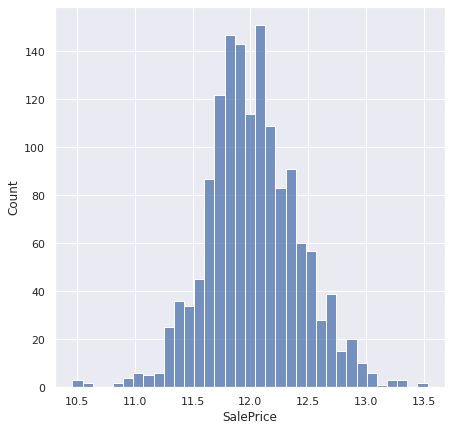

In [ ]:
plt.subplots(figsize=(7,7))
sns.histplot(data=df_train, x="SalePrice")


- Elabore una gráfica de barras donde se visualice cuándo las casas fueron construidas.


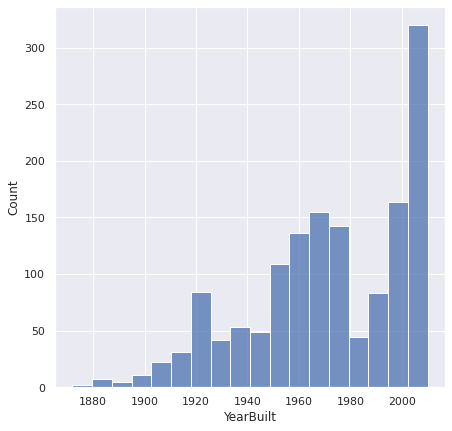

In [ ]:
plt.subplots(figsize=(7,7))
sns.histplot(data=df_train, x="YearBuilt");

- Muestre una gráfica que nos permita visualizar cuándo las casas fueron vendidas.


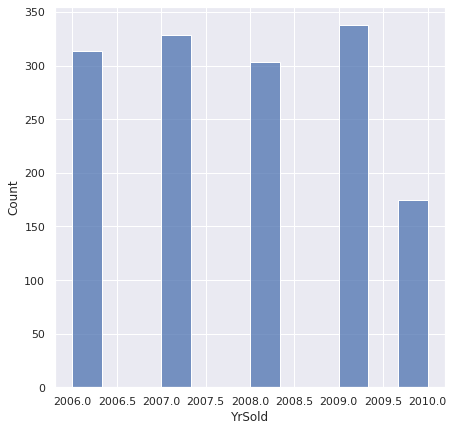

In [ ]:
plt.subplots(figsize=(7,7))
sns.histplot(data=df_train, x="YrSold");


- Muestre una gráfica que indique en qué vecindarios están las casas.


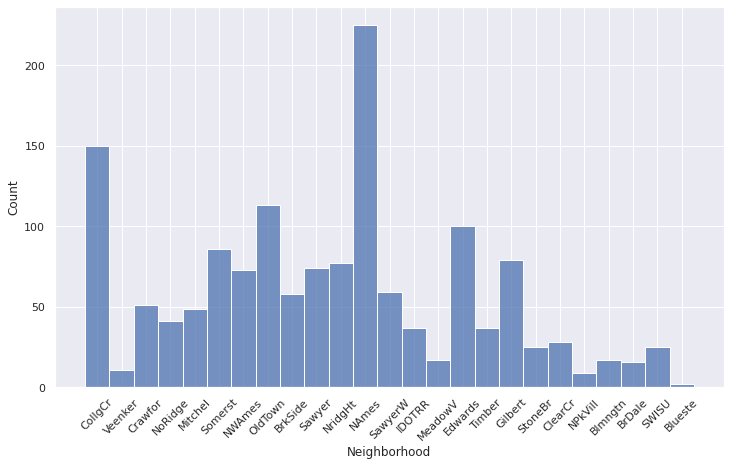

In [ ]:
plt.subplots(figsize=(12,7))
plt.xticks(rotation=45)
sns.histplot(data=df_train, x="Neighborhood");


- Muestre una gráfica que indique las dimensiones de las casas.

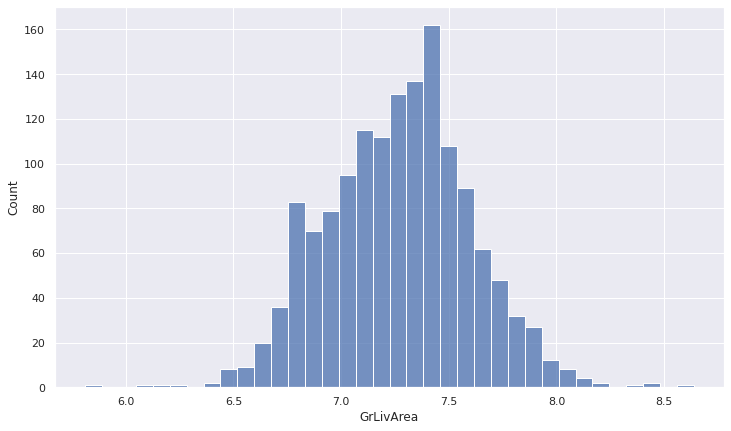

In [ ]:
plt.subplots(figsize=(12,7))
sns.histplot(data=df_train, x="GrLivArea");

---

**Características numéricas**

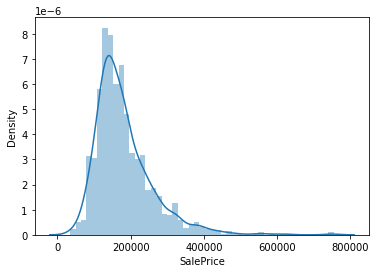

In [ ]:
# Comencemos con nuestra variable dependiente, SalePrice
sns.distplot(df_train['SalePrice']);

Vemos que SalePrice tiene un sesgo positivo. De hecho, obtenemos:

In [ ]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Por lo tanto, tiene un sesgo positivo y "picos" con colas gruesas o valores atípicos, es decir, a la derecha. Transformaremos esta función más adelante.

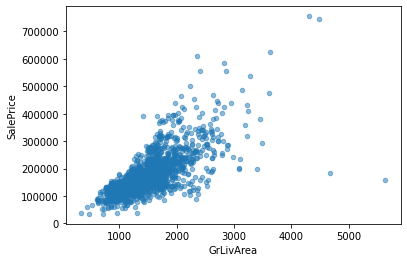

In [ ]:
# Diagrama de dispersión grlivarea/saleprice:

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

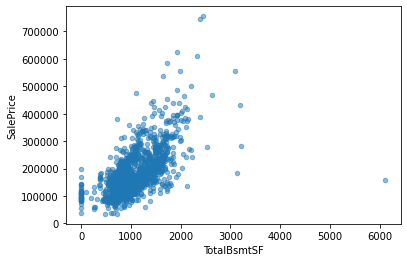

In [ ]:
# Diagrama de dispersión totalbsmtsf/saleprice:

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

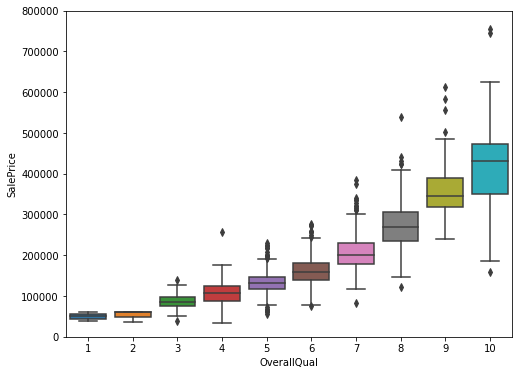

In [ ]:
# Diagrama de cajas overallqual/saleprice:

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data =data)
fig.axis(ymin=0, ymax=800000);

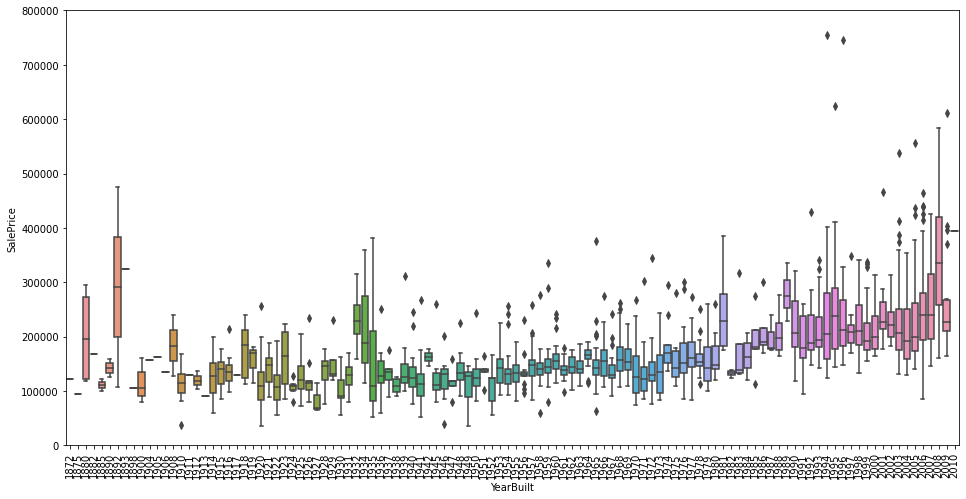

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data =data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


**Resumiendo**:

- 'GrLivArea' y 'TotalBsmtSF' mantienen una relación lineal positiva con 'SalePrice', aumentando en el mismo sentido. 
- En el caso de 'TotalBsmtSF', la pendiente de esta relación es muy acentuada.
- 'OverallQual' y 'YearBuilt' también parecen relacionadas con 'SalePrice' (más fuerte en el primer caso), tal y como se puede observar en los diagramas de cajas.

Sólo se han explorado cuatro variables, pero hay muchas otras por analizar.

## Analisis multivariante

Hasta ahora sólo se ha realizado el análisis de las variables que se "consideran" importantes. Se requiere un análisis más objetivo.

Para ello voy a realizar las siguientes pruebas de correlación:
- Matriz de correlación general.
- Matriz de correlación centrada en la variable 'SalePrice'.
- Diagramas de dispersión entre las variables más correlacionadas.

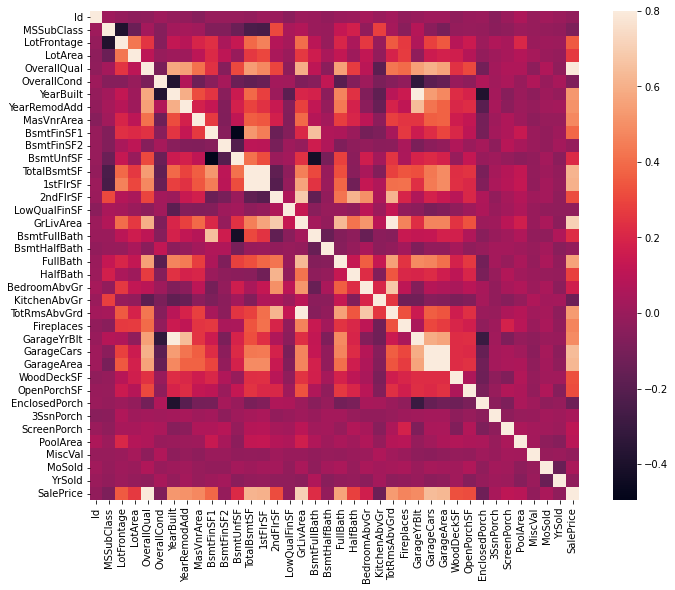

In [ ]:
# Matriz de correlación:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'TotalBsmtSF' y '1stFlrSF', seguidas por las variables 'GarageX'. En ambos casos parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'SalePrice', destacan las vistas anteriormente ('GrLivArea', 'TotalBsmtSF' y 'OverallQual'), pero hay otras que también deberían ser consideradas en cuenta.

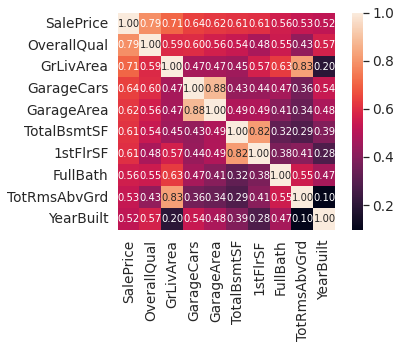

In [ ]:
# Mapa de calor de características de correlación positiva
# Matriz de correlación

k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
corr = df_train.corr()
corr[['SalePrice']].sort_values(by = 'SalePrice',ascending = False)\
.style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


En estas matrices de correlación se puede observar:

- 'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correlacionadas con 'SalePrice'.
- 'GarageCars' y 'GarageArea' también están fuertemente correlacionadas pero, como se ha comentado anteriormente, el número de coches que se pueden aparcar en un garaje es una consecuencia de su superficie. Es por esto que sólo se mantendrá una de estas variables en el análisis, 'GarageCars', ya que está más correlacionada con 'SalePrice'.
- 'TotalBsmtSF' y '1stFloor' plantean la misma situación. En este caso se mantendrá 'TotalBsmtSF'.
- 'FullBath' también está correlacionada con 'SalePrice'. 
- 'TotRmsAbvGrd' y 'GrLivArea', otro caso de multicolinealidad, es decir, que básicamente ofrecen la misma información.
- 'YearBuilt' también está ligeramente correlacionada con 'SalePrice'.

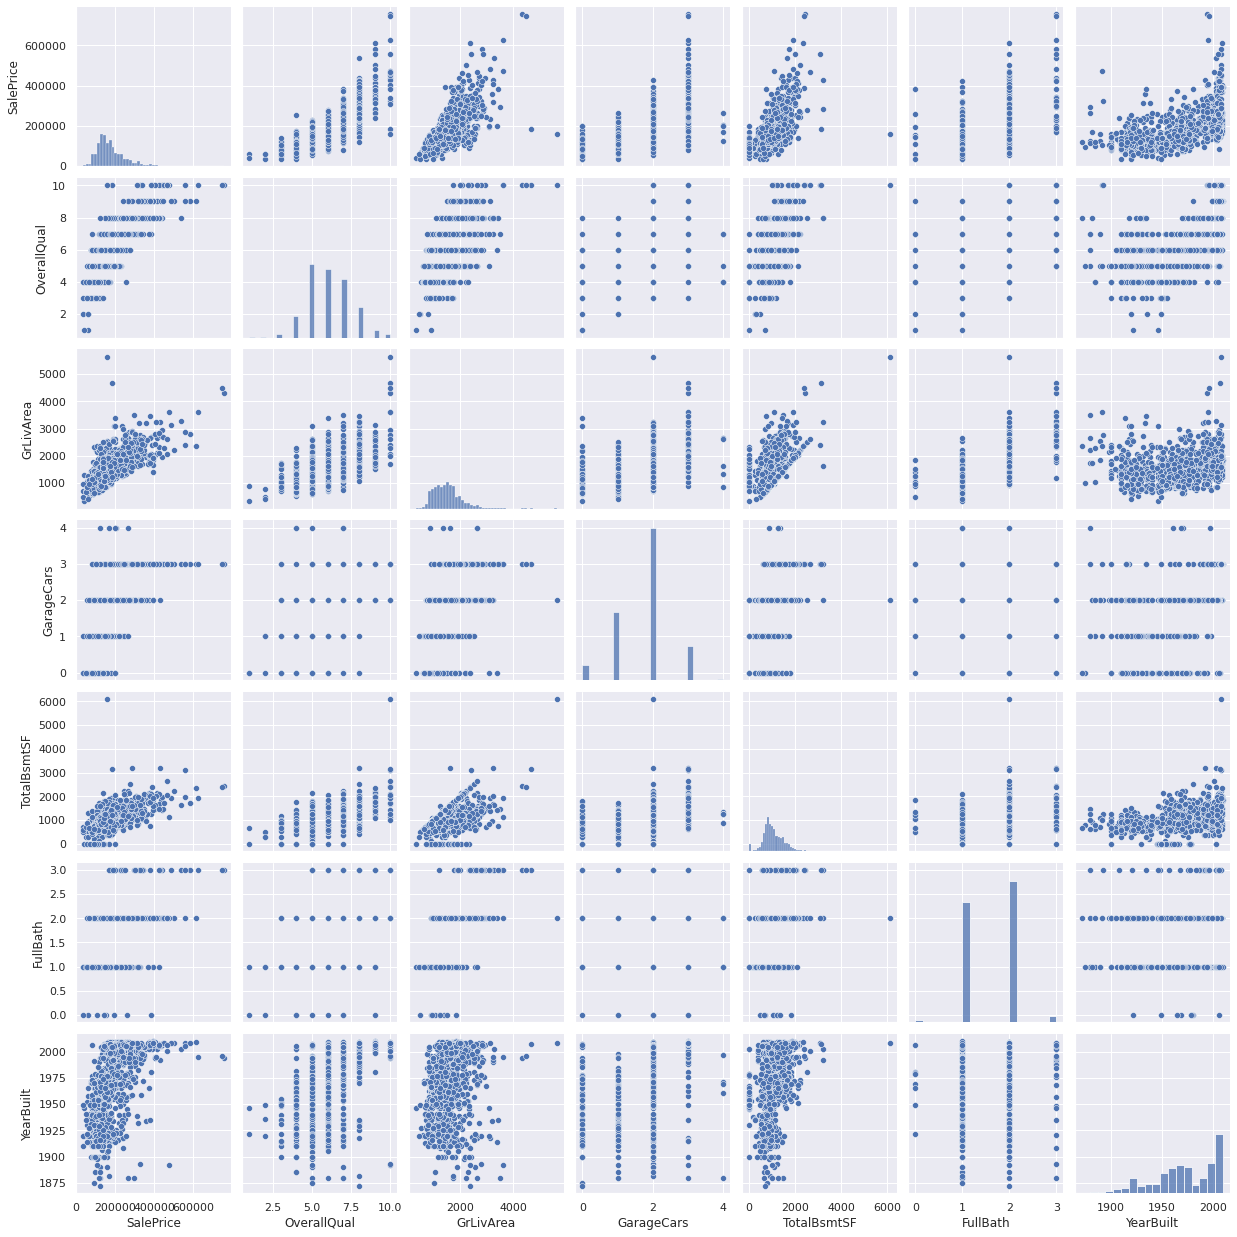

In [ ]:
# Scatter plot:

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Aunque ya habíamos visto algunas de las figuras, este diagrama nos facilita una comprensión general sobre las relaciones entre las variables.

## Limpieza de datos
### Datos faltantes

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos faltantes no esté sesgada u oculte una verdad incómoda.

In [ ]:
# Datos faltantes:

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


- Por razones prácticas se van a eliminar las variables con más de un 15% de datos faltantes (p.ej. 'PoolQC', 'MiscFeature', 'Alley', etc.); no parecen aspectos importantes a considerar al comprar una casa.

- Con respecto a las variables 'GarageX', se observa el mismo número de datos faltantes, hecho que quizás habría que estudiar con más detenimiento. Pero, dado que la información más relevante en cuanto al garaje ya está agrupada por la variable 'GarageCars', y que sólo se trata de un 5% de datos faltantes, se eliminan las citadas variables 'GarageX', además de las 'BsmtX' bajo el mismo argumento.

- En cuanto a las variables 'MasVnrArea' y 'MasVnrType', se puede decir que no son esenciales y que, incluso, tienen una fuerte correlación con 'YearBuilt' y 'OverallQual'. No parece que se vaya a perder mucha información si se eliminan 'MasVnrArea' y 'MasVnrType'.

- Para finalizar, se encuentra un dato faltante en la variable 'Electrical'. Ya que sólo se trata de una observación, se puede borrar y mantener la variable.

- En resumen, se van a borrar todas las variables con datos faltantes, excepto la variable 'Electrical'; en este caso sólo se borra la observación con el dato faltante.

In [ ]:
# Tratamiento de datos faltantes:

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() # Para comprobar que no hay más datos faltantes.

0

- Estandarice los valores para que tengan una media cero y una desviación estándar de 1
- Haga un análisis de valores atípicos en el campo 'SalePrice'

El objetivo es estudiar la variable 'SalePrice' de forma fácil, comprobando:

- Histograma - Curtosis y asimetría.
- Gráfica de probabilidad normal - La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

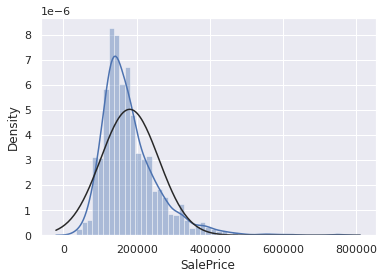

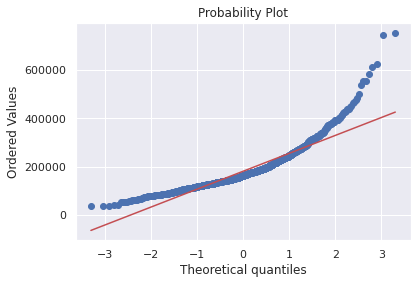

In [ ]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)


In [ ]:
# Transformación de los datos:

df_train['SalePrice'] = np.log(df_train['SalePrice'])

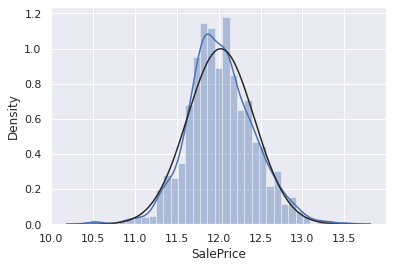

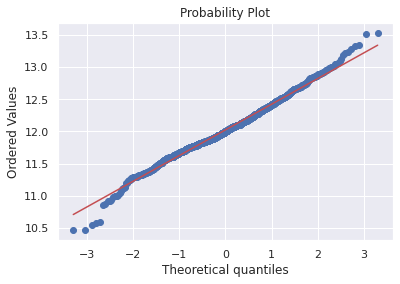

In [ ]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

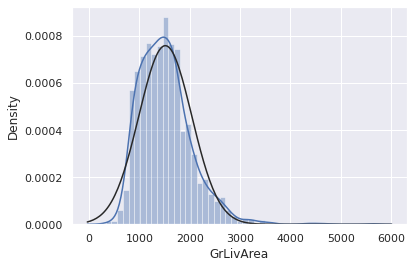

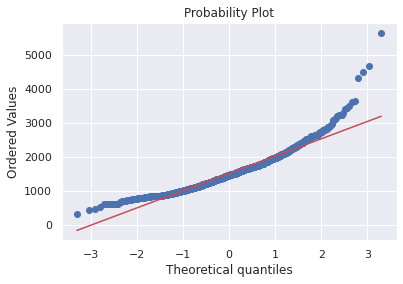

In [ ]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [ ]:
# Transformación de datos:

df_train['GrLivArea'] = np.log(df_train['GrLivArea'])


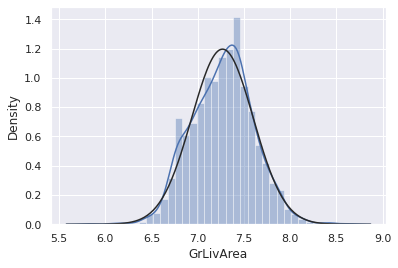

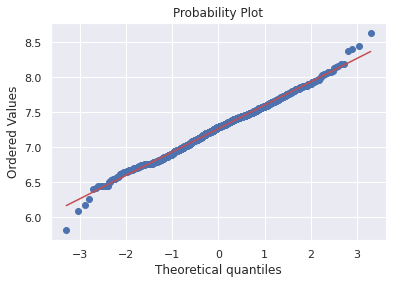

In [ ]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)


Se sigue con el estudio de la variable 'TotalBsmtSF'.

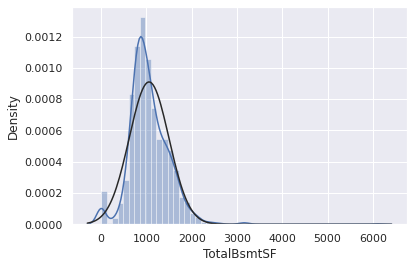

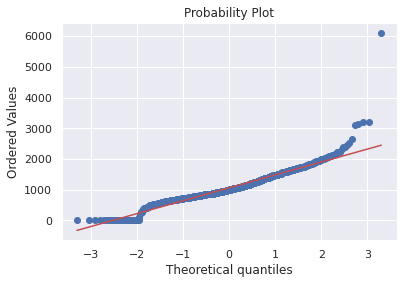

In [ ]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Estos gráficos nos muestran que la variable 'TotalBsmtSF':

    * Presenta asimetrías.
    * Hay un número significativo de observaciones con valor cero (casas sin sótano).
    * El valor cero no nos permite hacer transformaciones logarítmicas.

Para aplicar una transformación logarítmica, se crea una variable binaria (tener o no tener sótano). Después, se aplica la transformación logarítmica a todas las observaciones que no sean cero, ignorando aquellas con valor cero. De esta manera se podrán transformar los datos, sin perder el efecto de tener o no sótano.

In [ ]:
# Creación de la columna para una nueva variable categórica binaria (1 si area>0, 0 si area==0):
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

# Transformación de datos:
df_train.loc[df_train['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


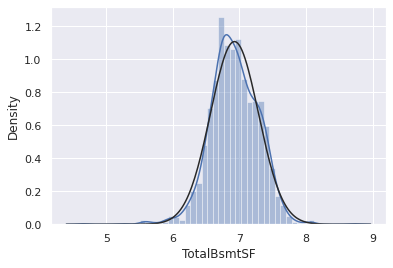

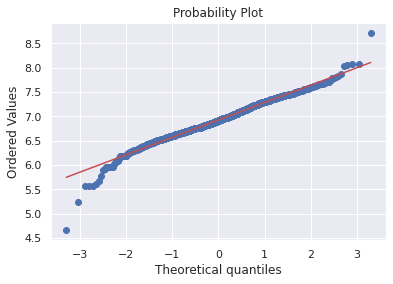

In [ ]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)